In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [2]:
#Each class contains different number of samples of arrays stored in .npy format. 
#Due to memory limitations, we will load 4000 images per class.
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/5*(vfold_ratio*5))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [3]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [4]:
print(len(x_train))
print(x_train.shape)

9600
(9600, 784)


full_numpy_bitmap_star


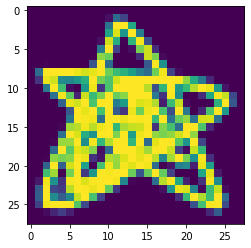

In [5]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

# Preprocessing Data

In [6]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Convolutional Neural Network Model

In [7]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (7, 7),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (7, 7), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (7, 7), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        800       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25120     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          100416    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

# Model Training

In [8]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 64, verbose=2, epochs=10)

Epoch 1/10
135/135 - 10s - loss: 0.3823 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.2882 - val_top_k_categorical_accuracy: 1.0000 - 10s/epoch - 72ms/step
Epoch 2/10
135/135 - 12s - loss: 0.1721 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1867 - val_top_k_categorical_accuracy: 1.0000 - 12s/epoch - 85ms/step
Epoch 3/10
135/135 - 11s - loss: 0.1182 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1612 - val_top_k_categorical_accuracy: 1.0000 - 11s/epoch - 79ms/step
Epoch 4/10
135/135 - 11s - loss: 0.0964 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1457 - val_top_k_categorical_accuracy: 1.0000 - 11s/epoch - 81ms/step
Epoch 5/10
135/135 - 11s - loss: 0.0775 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1268 - val_top_k_categorical_accuracy: 1.0000 - 11s/epoch - 82ms/step
Epoch 6/10
135/135 - 10s - loss: 0.0575 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.1306 - val_top_k_categorical_accuracy: 1.0000 - 10s/epoch - 75ms/step
Epoch 7/10
135/135 - 10s - loss: 0

# Model Testing

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

Test accuracy: 100.00%


# Model Inference

['full_numpy_bitmap_star', 'full_numpy_bitmap_zigzag', 'full_numpy_bitmap_triangle']


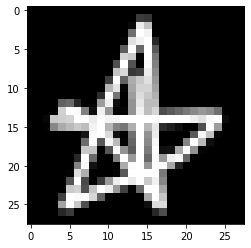

In [10]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze(), cmap="gray") 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

# Store Classes

In [11]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

# Save and Convert

In [12]:
model.save('keras.h5')

In [13]:
!mkdir model

A subdirectory or file model already exists.


In [14]:
!tensorflowjs_converter --input_format keras keras.h5 model/

2022-06-02 22:36:04.810290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-02 22:36:04.810334: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
